In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [3]:
data = pd.read_csv('creditcard.csv')   # v1-v28是主成分
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.Time.describe()   # 两天内的信用卡交易

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [6]:
data.Class.value_counts()    # 一共产生284807笔交易，其中492笔被盗刷

0    284315
1       492
Name: Class, dtype: int64

In [7]:
 492/284315

0.0017304750013189597

## EDA探索

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 标签

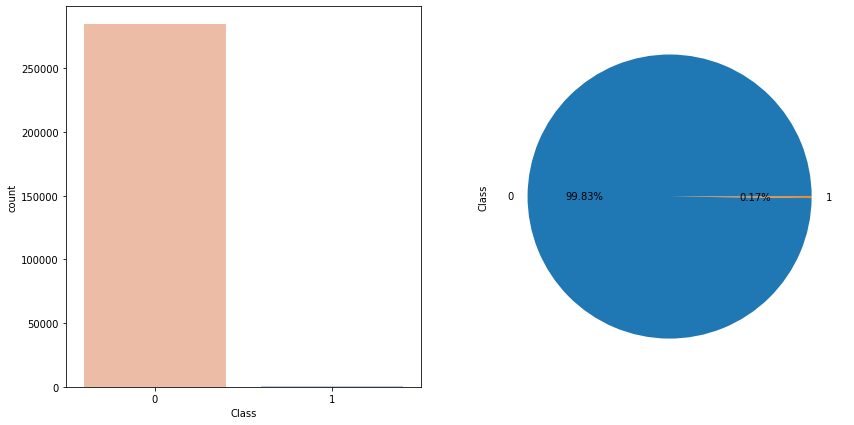

In [16]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Class',data=data,ax=ax[0],palette='coolwarm_r')
data['Class'].value_counts().plot(kind='pie',ax=ax[1],autopct='%1.2f%%')

## Time

In [17]:
data.Time

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [18]:
# 秒转换成小时
data['Hour'] = data['Time'].apply(lambda x:divmod(x,3600)[0])    # 返回商

In [19]:
data.Hour

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    47.0
284803    47.0
284804    47.0
284805    47.0
284806    47.0
Name: Hour, Length: 284807, dtype: float64

## 变量与被盗刷之间的关系

In [21]:
Xfraud = data.loc[data['Class']==1]   # 被盗刷的用户
XnonFraud = data.loc[data['Class']==0]  # 正常用户

正常用户和非正常用户的区别

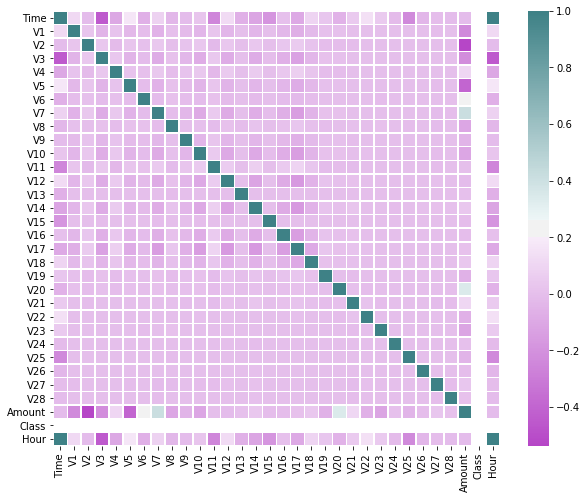

In [26]:
plt.figure(figsize=(10,8))

# 设置颜色
cmap  = sns.diverging_palette(300,200,as_cmap=True)

sns.heatmap(XnonFraud.corr(),cmap=cmap,linewidths=0.5)

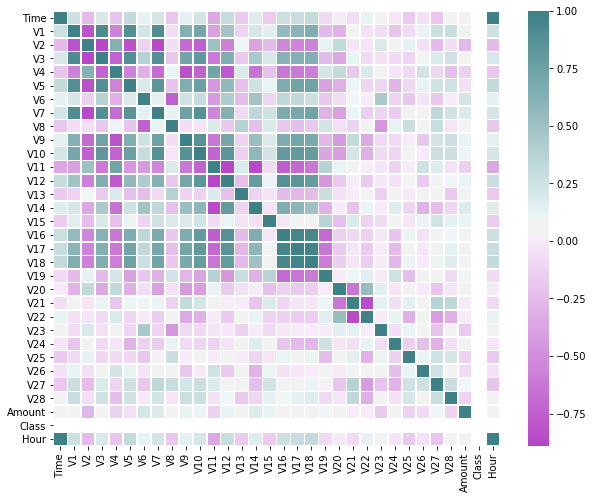

In [27]:
plt.figure(figsize=(10,8))

# 设置颜色
cmap  = sns.diverging_palette(300,200,as_cmap=True)

sns.heatmap(Xfraud.corr(),cmap=cmap,linewidths=0.5)

### 交易金额和是否被盗刷的关系

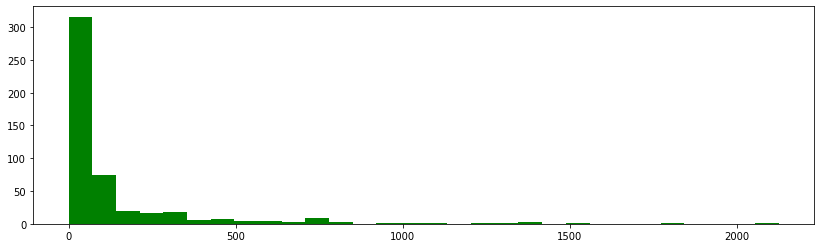

In [34]:
plt.figure(figsize=(14,4))
plt.hist(data['Amount'][data['Class']==1],bins=30,color='green');

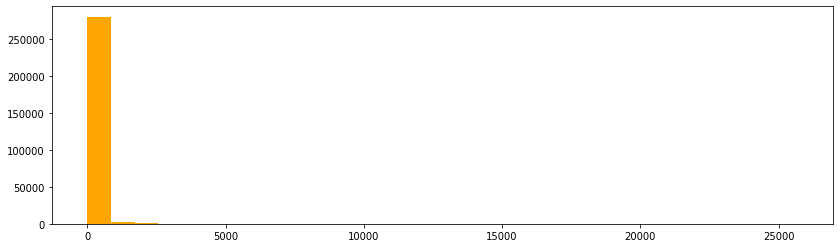

In [36]:
plt.figure(figsize=(14,4))
plt.hist(data['Amount'][data['Class']==0],bins=30,color='orange');

### 消费时间的偏好

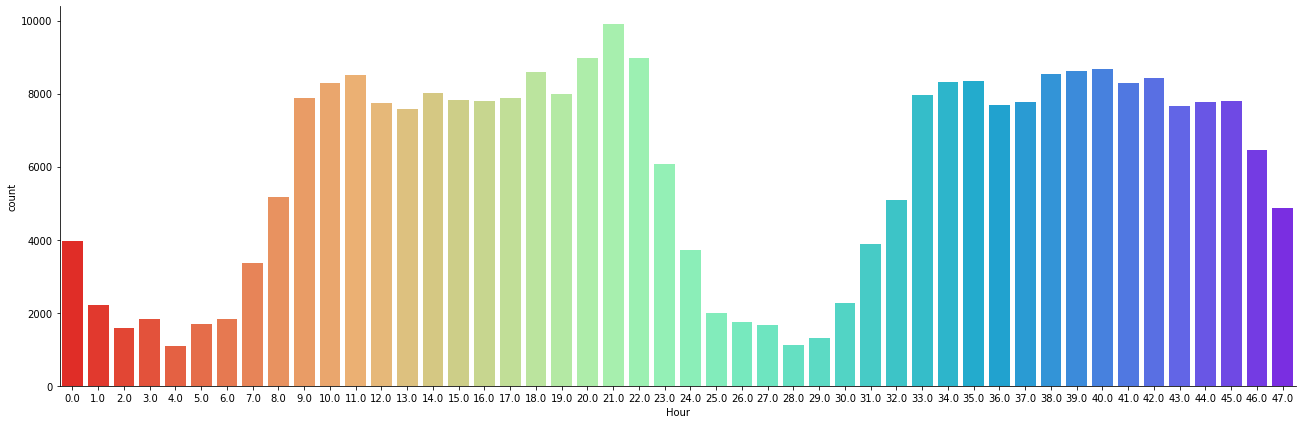

In [39]:
sns.factorplot(x='Hour',data=data,kind='count',palette='rainbow_r',size=6,aspect=3);

### 盗刷交易、交易金额和交易时间的关系

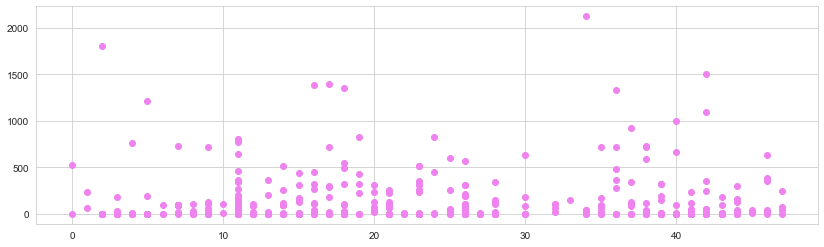

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,4))
plt.scatter(data['Hour'][data['Class']==1],data['Amount'][data['Class']==1],color='violet');

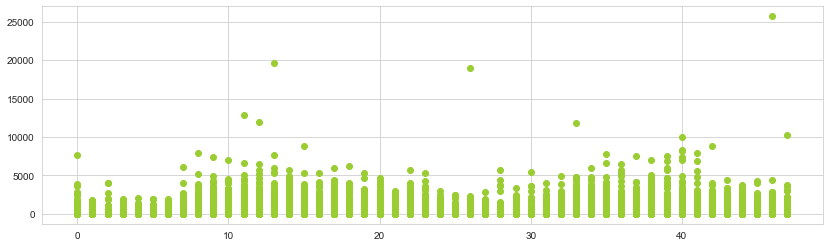

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,4))
plt.scatter(data['Hour'][data['Class']==0],data['Amount'][data['Class']==0],color='yellowgreen');

### v1-v28

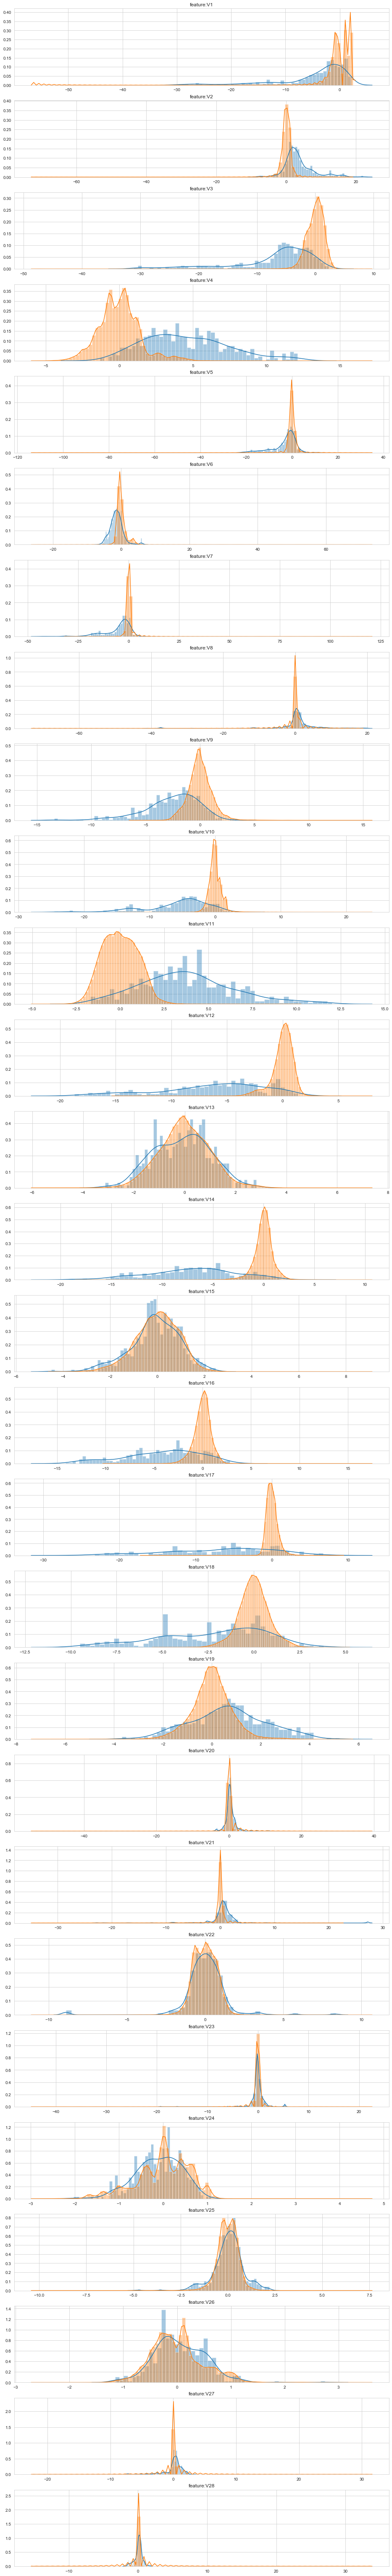

In [50]:
import matplotlib.gridspec as gridspec
v_feat = data.iloc[:,1:29].columns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28,1)   # 子图的位置

for i,j in enumerate(data[v_feat]):
    ax = plt.subplot(gs[i])  # 定位位置
    sns.distplot(data[j][data['Class']==1], bins=50)
    sns.distplot(data[j][data['Class']==0], bins=100)
    ax.set_xlabel('')  # 去掉横坐标名字
    ax.set_title('feature:'+str(j))

In [51]:
droplist = ['V8','V13','V15','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time']
data_new = data.drop(droplist,axis=1)
data_new.shape

(284807, 19)

In [53]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,1.768627e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136
V11,284807.0,9.170318e-16,1.020713,-4.797473,-0.762494,-0.032757,0.739593,12.018913


## amount做标准化

In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_new['Amount'] = ss.fit_transform(data_new[['Amount']])   # 二维矩阵
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.244964,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.342475,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,1.160686,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.140534,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.073403,0,0.0


## 建模

In [56]:
X = data_new.loc[:,data_new.columns!='Class']
Y = data_new.loc[:,'Class']

In [57]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=1234)
Xtrain.shape

(199364, 18)

### 随机森林选择重要性特征

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50,random_state=1234).fit(Xtrain,Ytrain)
clf.feature_importances_

array([0.0197361 , 0.01488418, 0.02374362, 0.03820901, 0.01600171,
       0.02168631, 0.02987728, 0.04115539, 0.09041941, 0.04414001,
       0.14952152, 0.12471495, 0.09239328, 0.21229259, 0.03077257,
       0.02423234, 0.01574541, 0.01047432])

严格可剔除小于0.02重要性的特征

In [59]:
for i in zip(Xtrain.columns,clf.feature_importances_):
    print(i)

('V1', 0.019736097075631825)
('V2', 0.014884184780745846)
('V3', 0.023743617147182036)
('V4', 0.03820901118450064)
('V5', 0.01600170598668154)
('V6', 0.021686307649927974)
('V7', 0.029877283624769845)
('V9', 0.04115539450783597)
('V10', 0.09041940944284615)
('V11', 0.04414001187698144)
('V12', 0.14952151943237935)
('V14', 0.12471494577339949)
('V16', 0.09239327617764763)
('V17', 0.21229259301847167)
('V18', 0.03077256752727885)
('V19', 0.024232344981879466)
('Amount', 0.015745406489077466)
('Hour', 0.010474323322763025)


In [63]:
clf.score(Xtest,Ytest)

0.9994382219725431

In [64]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,clf.predict(Xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.88      0.76      0.82       141

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### 逻辑回归

In [60]:
from sklearn.linear_model import LogisticRegression

In [65]:
LR = LogisticRegression(class_weight='balanced').fit(Xtrain,Ytrain)
LR.score(Xtest,Ytest)   

0.9733857659492293

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,LR.predict(Xtest)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85302
           1       0.05      0.90      0.10       141

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.99     85443



### SMOTE处理样本不均衡

In [67]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=1)
# 对训练集做过采样
Xtrain_smo,Ytrain_smo = smo.fit_sample(Xtrain,Ytrain)
from  collections import Counter
Counter(Ytrain_smo)

Counter({0: 199013, 1: 199013})

In [70]:
LR = LogisticRegression().fit(Xtrain_smo,Ytrain_smo)
LR.score(Xtest,Ytest) 

0.9730697658087848

In [71]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,LR.predict(Xtest)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85302
           1       0.05      0.90      0.10       141

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



### 网格搜索

In [ ]:
from sklearn.model_selection import GridSearchCV
# 设置可调参数
param_grid = {'C':[0.01,0.1,1,10,100],'penalty':['l1','l2']}

grid_search = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid,cv=5)
grid_search.fit(Xtrain_smo,Ytrain_smo)

In [ ]:
grid_search.best_params_